In [1]:
# dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy
import sklearn
import os as os

import seaborn as sn
import matplotlib.pyplot as plt

# regression
from statsmodels.api import OLS
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy

import math

In [2]:
# load data
sticks = pd.read_csv('Survey Data.csv')

In [3]:
sticks.head()

,Obs,Customer,I tend to plan things very carefully.,I sometimes have trouble controlling my spending.,I think it is important to purchase products that are made locally.,I carefully consider the health benefits of what I eat.
0,2,0,1,2,3.0,2
1,3,0,1,3,3.0,2
2,4,0,2,4,3.0,2
3,5,0,2,4,1.0,2
4,10,0,2,4,2.0,3


In [4]:
sticks.describe()

,Obs,Customer,I tend to plan things very carefully.,I sometimes have trouble controlling my spending.,I think it is important to purchase products that are made locally.,I carefully consider the health benefits of what I eat.
count,395.000000,395.000000,395.000000,395.000000,393.000000,395.000000
mean,259.539241,0.513924,1.822785,2.868354,1.893130,1.820253
std,136.864843,0.500440,0.711749,0.946748,0.625788,0.709325
min,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,141.500000,0.000000,1.000000,2.000000,2.000000,1.000000
50%,273.000000,1.000000,2.000000,3.000000,2.000000,2.000000
75%,376.500000,1.000000,2.000000,4.000000,2.000000,2.000000
max,482.000000,1.000000,4.000000,4.000000,4.000000,4.000000


In [5]:
sticks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 6 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Obs                                                                  395 non-null    int64  
 1   Customer                                                             395 non-null    int64  
 2   I tend to plan things very carefully.                                395 non-null    int64  
 3   I sometimes have trouble controlling my spending.                    395 non-null    int64  
 4   I think it is important to purchase products that are made locally.  393 non-null    float64
 5   I carefully consider the health benefits of what I eat.              395 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 18.6 KB


In [6]:
# remove null value
sticks = sticks.dropna()

In [7]:
# exclude customer status from the clustering (you should always only feed only columns that contribute to the clusters)
sticks_forcluster = sticks.drop(columns=['Obs', 'Customer'])

In [8]:
# run a number of values for K
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(sticks_forcluster)
    distortions.append(kmeanModel.inertia_)

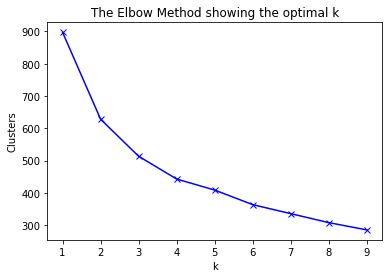

In [9]:
# create an elbow plot
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Clusters')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [10]:
# kmeans results after choosing number of clusters
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(sticks_forcluster)

KMeans(n_clusters=5)

In [11]:
# assign cluster number
sticks_forcluster['k_means']=kmeanModel.predict(sticks_forcluster)

In [12]:
len(sticks_forcluster)
sticks_forcluster.info()
sticks_forcluster.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 5 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   I tend to plan things very carefully.                                393 non-null    int64  
 1   I sometimes have trouble controlling my spending.                    393 non-null    int64  
 2   I think it is important to purchase products that are made locally.  393 non-null    float64
 3   I carefully consider the health benefits of what I eat.              393 non-null    int64  
 4   k_means                                                              393 non-null    int32  
dtypes: float64(1), int32(1), int64(3)
memory usage: 16.9 KB


,I tend to plan things very carefully.,I sometimes have trouble controlling my spending.,I think it is important to purchase products that are made locally.,I carefully consider the health benefits of what I eat.,k_means
0,1,2,3.0,2,3
1,1,3,3.0,2,3
2,2,4,3.0,2,1
3,2,4,1.0,2,1
4,2,4,2.0,3,1


In [13]:
# merge back to other data
# Select the ones you want
sticks['km.out.cluster'] = sticks_forcluster['k_means']

In [14]:
sticks.head()

,Obs,Customer,I tend to plan things very carefully.,I sometimes have trouble controlling my spending.,I think it is important to purchase products that are made locally.,I carefully consider the health benefits of what I eat.,km.out.cluster
0,2,0,1,2,3.0,2,3
1,3,0,1,3,3.0,2,3
2,4,0,2,4,3.0,2,1
3,5,0,2,4,1.0,2,1
4,10,0,2,4,2.0,3,1


In [15]:
# how many ended up in each cluster
pd.Series(kmeanModel.labels_).value_counts()

1    111
4     96
2     66
0     62
3     58
dtype: int64

In [16]:
# cluster centers
print(kmeanModel.cluster_centers_)

[[1.24193548 1.70967742 1.58064516 1.37096774]
 [2.2972973  3.45045045 1.83783784 1.8018018 ]
 [2.34848485 1.89393939 1.75757576 1.95454545]
 [2.01724138 2.68965517 2.65517241 2.87931034]
 [1.16666667 3.71875    1.79166667 1.375     ]]


cluster_centers_: ndarray of shape (n_clusters, n_features)

So, each column is a feature (mean) and each row is the cluster

In [17]:
Survey_Data_Cluster_Centers = pd.DataFrame(kmeanModel.cluster_centers_)
Survey_Data_Cluster_Centers.head()

,0,1,2,3
0,1.241935,1.709677,1.580645,1.370968
1,2.297297,3.450450,1.837838,1.801802
2,2.348485,1.893939,1.757576,1.954545
3,2.017241,2.689655,2.655172,2.879310
4,1.166667,3.718750,1.791667,1.375000


In [18]:
# cluster assignment
kmeanModel.labels_

array([3, 3, 1, 1, 1, 4, 3, 0, 3, 4, 1, 1, 4, 1, 4, 4, 2, 1, 3, 2, 4, 1,
       1, 4, 4, 3, 1, 2, 1, 0, 1, 1, 4, 3, 0, 1, 4, 3, 4, 1, 1, 1, 3, 2,
       3, 3, 2, 4, 2, 3, 3, 1, 0, 2, 3, 2, 2, 1, 3, 1, 0, 0, 2, 3, 1, 2,
       1, 2, 3, 0, 1, 3, 1, 1, 4, 0, 2, 4, 3, 0, 4, 3, 4, 0, 2, 2, 0, 1,
       1, 3, 1, 4, 0, 0, 3, 2, 3, 4, 1, 2, 0, 2, 3, 2, 2, 4, 3, 4, 1, 2,
       0, 3, 1, 0, 1, 3, 4, 3, 3, 4, 3, 3, 1, 0, 3, 1, 0, 2, 2, 4, 0, 4,
       1, 1, 4, 1, 3, 4, 4, 0, 3, 1, 1, 1, 4, 0, 1, 1, 1, 4, 2, 1, 1, 3,
       3, 1, 1, 4, 2, 1, 2, 1, 4, 3, 1, 3, 1, 0, 0, 0, 3, 4, 2, 0, 4, 1,
       4, 3, 0, 2, 1, 1, 3, 1, 3, 1, 0, 3, 4, 0, 1, 2, 1, 1, 4, 3, 4, 1,
       1, 0, 1, 1, 4, 2, 1, 4, 4, 0, 2, 4, 1, 4, 3, 0, 0, 0, 2, 2, 4, 4,
       4, 0, 2, 4, 1, 2, 1, 1, 1, 1, 2, 0, 1, 4, 2, 4, 1, 3, 4, 0, 1, 4,
       1, 0, 4, 4, 0, 1, 1, 4, 3, 4, 1, 4, 4, 1, 2, 1, 4, 4, 4, 4, 4, 1,
       3, 4, 4, 1, 0, 0, 0, 2, 4, 4, 1, 3, 4, 0, 4, 2, 2, 0, 0, 3, 2, 4,
       3, 2, 1, 4, 4, 2, 1, 4, 0, 0, 1, 4, 3, 4, 1,

In [19]:
# Sum of distances of observation to its closest cluster center
kmeanModel.inertia_

# that looks pretty close to R and SPSS

395.05242661447494

Text(0, 0.5, 'HEALTH BENEFITS IMPORTANT')

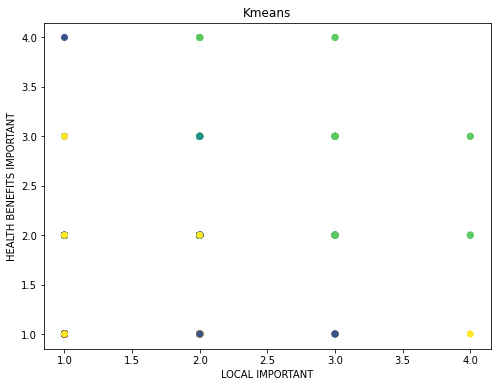

In [20]:
# create a plot to make sense of this
plt.figure(figsize=(8, 6))
plt.scatter(sticks['I think it is important to purchase products that are made locally.'], 
            sticks['I carefully consider the health benefits of what I eat.'], 
            c=sticks['km.out.cluster'])
plt.title("Kmeans")
plt.xlabel("LOCAL IMPORTANT")
plt.ylabel("HEALTH BENEFITS IMPORTANT")

In [21]:
# remember mosiac plots
from statsmodels.graphics.mosaicplot import mosaic

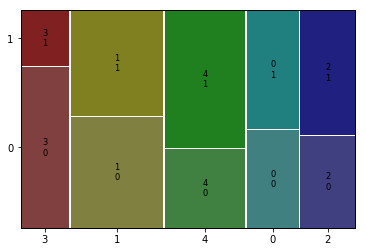

In [22]:
# mosiac plot
mosaic(sticks,['km.out.cluster','Customer'])
plt.show()

In [25]:
# export the result
Survey_Data_Cluster_Centers.to_csv('Survey_Data_Cluster_Centers_Python.csv') 

In [26]:
# export data to csv
sticks.to_csv('Survey_Data_Cluster_Python.csv') 